## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# import necessary libs
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# load dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Num of rows in our dataset
n_rows = df.shape[0]
n_rows

294478

c. The number of unique users in the dataset.

In [4]:
# Num of unique values for each column 
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
# prop of converted users
prop_converts = df['converted'].mean()
prop_converts

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# df that's contain new_page and treatment don't match
df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page'))].head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [7]:
# Num of times new_page and treatment don't match
num_of_new_not_treat = df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page'))].shape[0]
num_of_new_not_treat

3893

f. Do any of the rows have missing values?

In [8]:
# No NAN values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# df_1 contain treatment not match with new_page
df_1 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
# df_2 contain control not match with old_page
df_2 = df[(df.group == 'control') & (df.landing_page == 'old_page')] 
# concat the two dfs
df2 = pd.concat([df_1, df_2])
df_1.shape[0], df_2.shape[0]

(145311, 145274)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# num of unique values
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# check duplicate
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [13]:
# repeated user id
repeated_user = df2[df2['user_id'].duplicated()].user_id

In [14]:
# row info of repeated user
df2[df2['user_id'] == repeated_user.iloc[0]]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# remove repeated user
df2.drop_duplicates('user_id', inplace=True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [17]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
# count values of converted users
df2.converted.value_counts()

0    255831
1     34753
Name: converted, dtype: int64

In [19]:
# the probability of an individual converting regardless of the page
df2.converted.value_counts()[1]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# group a group and converted size
df2.groupby(['group', 'converted']).size()

group      converted
control    0            127785
           1             17489
treatment  0            128046
           1             17264
dtype: int64

In [21]:
# an individual was in the control group, what is the probability they converted
df2.groupby(['group', 'converted']).size()[1]/df2.group.value_counts()[1]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
# an individual was in the treatment group, what is the probability they converted
df2.groupby(['group', 'converted']).size()[3]/df2.group.value_counts()[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
# count values of landing pages
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [24]:
# the probability that an individual received the new page
df2.landing_page.value_counts()[0]/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

- No, I think there is sufficient evidence to conclude that the new treatment page leads to more conversions.
- The difference between the percentage of individuals were in the treatment group and converted (12%) and the percentage of individuals were in the control group and converted (11%) is very small.
- In conclusion, the new_page did not increase the conversion rate.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- Null hypothesis: the conversion rate of the new page is less than or equal the conversion rate of the old page.
                                                       p_new <= p_old
- Alternative hypothesis: the conversion rate of the new page is greater than the conversion rate of the old page.
                                                       p_new > p_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
# the conversion rate for 𝑝𝑛𝑒𝑤
cr_p_new = df2.converted.mean()
cr_p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
# the conversion rate for  𝑝𝑜𝑙𝑑
cr_p_old = df2.converted.mean()
cr_p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
# count values of group
df2.group.value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

In [28]:
# the number of individuals in the treatment group nnew
n_new = df2.group.value_counts()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
# the number of individuals in the control group nold
n_old = df2.group.value_counts()[1]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
# create treatment df
treatment_df = df2[df2['group'] == 'treatment']
treatment_df.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [31]:
# Simulate 𝑛𝑛𝑒𝑤  transactions with a conversion rate of  𝑝𝑛𝑒𝑤  under the null.
new_page_converted = treatment_df.sample(n_new, replace=True)['converted']
new_page_converted.mean()

0.11809923611589017

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
# create control df
control_df = df2[df2['group'] == 'control']
control_df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [33]:
# Simulate 𝑛old transactions with a conversion rate of  𝑝old  under the null.
old_page_converted = control_df.sample(n_old, replace=True)['converted']
old_page_converted.mean()

0.11980120324352603

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.0017019671276358589

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [35]:
# run simulation 10000 times
p_diffs = []

for _ in range(10000):
    new_page_convert = treatment_df.sample(n_new, replace=True)['converted'].mean()
    old_page_convert = control_df.sample(n_old, replace=True)['converted'].mean()
    p_diffs.append(new_page_convert - old_page_convert)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,1,'Difference of new_page & old_page converted')

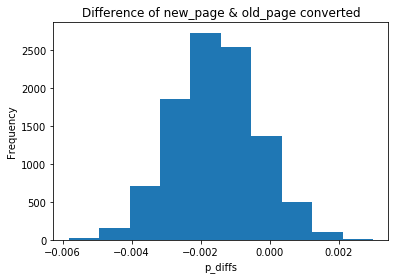

In [36]:
# convert to numpy array
p_diffs = np.array(p_diffs)

# plot sampling distribution
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Difference of new_page & old_page converted')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
# display observed difference
obs_diff = treatment_df.converted.mean() - control_df.converted.mean()
obs_diff

-0.0015782389853555567

In [38]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffs), p_diffs.size)

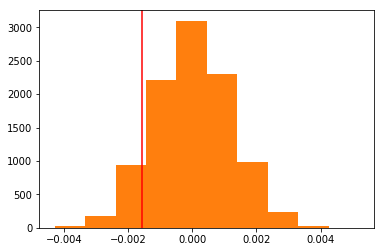

In [39]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

In [40]:
# compute p value
(null_vals > obs_diff).mean()

0.90649999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- We computed the p-value.
- p-value is the different betwwen means,the actual difference betwwen the old and new pages that's converted and the difference betweem the random observations of the old and new pages that's converted.
- the 88.81% of p-value means that we can't reject the null hypothesis (fail to reject) because this percentage exceeds the critical value of 5% of error.
- we cannot assume the new page converts more users than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
# group landing page and converted
df2.groupby(['landing_page', 'converted']).size()

landing_page  converted
new_page      0            128046
              1             17264
old_page      0            127785
              1             17489
dtype: int64

In [42]:
# count values of landing page
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [43]:
import statsmodels.api as sm

convert_old = df2.groupby(['landing_page', 'converted']).size()[3]
convert_new = df2.groupby(['landing_page', 'converted']).size()[1]
n_old = df2.landing_page.value_counts()[1]
n_new = df2.landing_page.value_counts()[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [44]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- A z-score of 1.31 is 1.31 standard deviation above the mean. That's less than 1.96 that's within the confidence interval range of 95%. 
- p-value(0.905) is different than what we computed in parts j and k but still  exceeds the critical value of 5% of error.
- In Conclusion w fail to reject the null hypothesis. the conversion rate of the new page is less than or equal the conversion rate of the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- I think use logistic regression because the dependent variable is binary variable.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
# create intercept column
df2['intercept'] = 1

In [46]:
# create dummy variables from the group column
df2[['ab_page','treatment']] = pd.get_dummies(df2['group'])
# drop the treatment column since this is not necessary
df2 = df2.drop('treatment', 1)

In [47]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [48]:
# instantiate your regression model
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
# fit the model
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
# summary the results
results.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-09 18:19 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

In [50]:
np.exp(0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- Null hypothesis: the conversion rate of the new page is less than or equal the conversion rate of the old page 
- Alternative hypothesis: the conversion rate of the new page is greater than the conversion rate of the old page
- The p-value associated with ab_page is 0.19. it does differ because our null and alternative hypthesis model assumed that there is an equal probability of the old and new page converting users. The null cannot be rejected because 0.19 is above our Type I error threshold of 0.05.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- It is a good idea to consider other factors in order to to identify other potential influences on the conversion rate.
- A disadvantage is that the model gets more complex. and the overfitting of the model will face the problems of multiple regression like Multicollinearity

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

- By computing the means of coversion rate for each country we find that's they have a similar results CA, UK and US (0.115, 0.120, 0.119) so the country doesn't effect 

In [51]:
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [52]:
# values of country
df3.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [53]:
# create dummy variables for country column
df3[['CA','UK', 'US']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [54]:
df4 = df2.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df4.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,US,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,CA,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,UK,0,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,CA,1,0,0


In [55]:
# converted mean for each country
df4[df4['CA'] == 1].converted.mean(), df4[df4['UK'] == 1].converted.mean(), df4[df4['US'] == 1].converted.mean()

(0.11531829781364232, 0.12059448568984076, 0.1195468006423762)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
df4['ab_UK'] = df4['ab_page'] * df4['UK']
df4['ab_US'] = df4['ab_page'] * df4['US']
lm3 = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'UK' , 'US', 'ab_UK', 'ab_US']])
results = lm3.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-09 18:19 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0715    0.0371  -55.7977  0.0000  -2.1442  -1.9987
ab_page        0.0674    0.0520    1.2967  0.1947  -0.0345   0.1694
UK             0.0901    0.0405    2.2252  0.0261   0.0107   0.1694
US             0.0644    0.0384    1.6788  0.0932  -0.0108   0.1396
ab_UK         -0.0783    0.0568   -1.3783  0.1681  -0.1896   0.0330
ab_US         -0.0469    0.0538   -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

In [57]:
np.exp(results.params)

intercept    0.126002
ab_page      1.069775
UK           1.094247
US           1.066532
ab_UK        0.924703
ab_US        0.954198
dtype: float64

- Summary: By looking at the ratio of the interaction between countries and ab_page, we have a similar result of the ab_page converting users in each country. We fail to reject the null hypothesis; the conversion rate of the new page is less than or equal the conversion rate of the old page.

## Conclusion

- After the statistical tests we made, the actual difference observed, Z-test and logistic regression model, the results are similar to the new and old page to converting users. We fail to reject the null hypothesis. 
- My Opinion is that's keeping the old page better than wasting time, money and efforts in the new page.

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0